# Project

## Data Exploration

In [3]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("training_data_fall2024.csv")

In [5]:
data = data.dropna()
data.shape

(1600, 16)

In [6]:
data.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [7]:
data['snow'].unique() #Categorical data. This variable is useless, as it is constant and will add nothing to our models

array([0])

In [8]:
#These are 0-1 variables, meaning they are categorical

In [9]:
data['holiday'].unique(), data['weekday'].unique(), data['summertime'].unique()

(array([0, 1]), array([0, 1]), array([0, 1]))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


'increase_stock', 'snow', 'holiday', 'summertime' are the only categorical feature we will be dealing with

In [12]:
data.describe()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.0,0.042713,13.082500,64.322375,15.344125
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.0,0.421198,7.756652,32.748869,2.323737
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000
25%,5.00000,1.000000,3.000000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.0,0.000000,7.500000,28.800000,16.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.0,0.000000,12.300000,79.300000,16.000000
75%,17.00000,5.000000,9.000000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.0,0.000000,17.600000,92.800000,16.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.800000,100.000000,16.000000


In [13]:
data['increase_stock'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

### Histogram with all the data

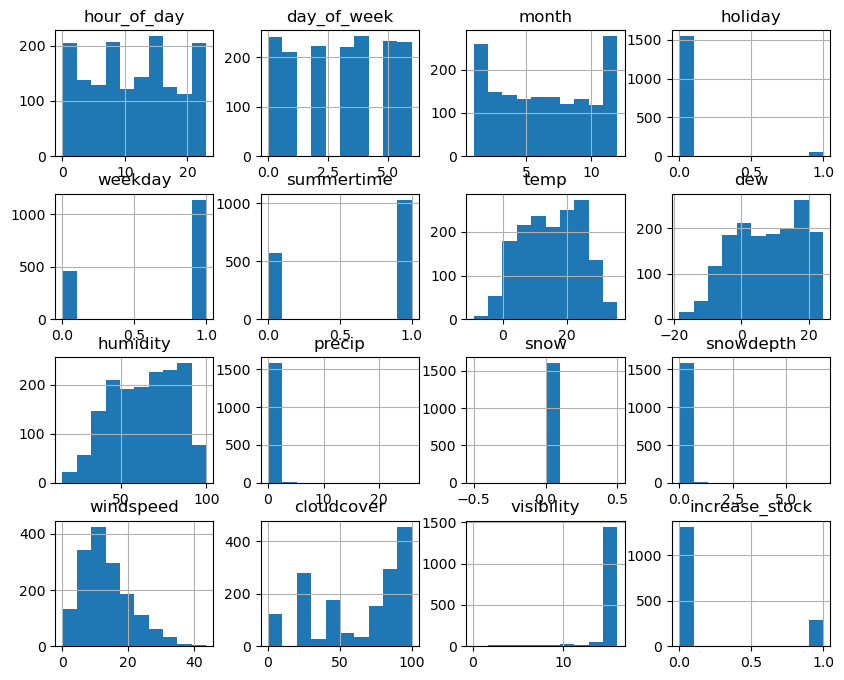

In [15]:
data.hist(figsize=(10, 8))
plt.show()

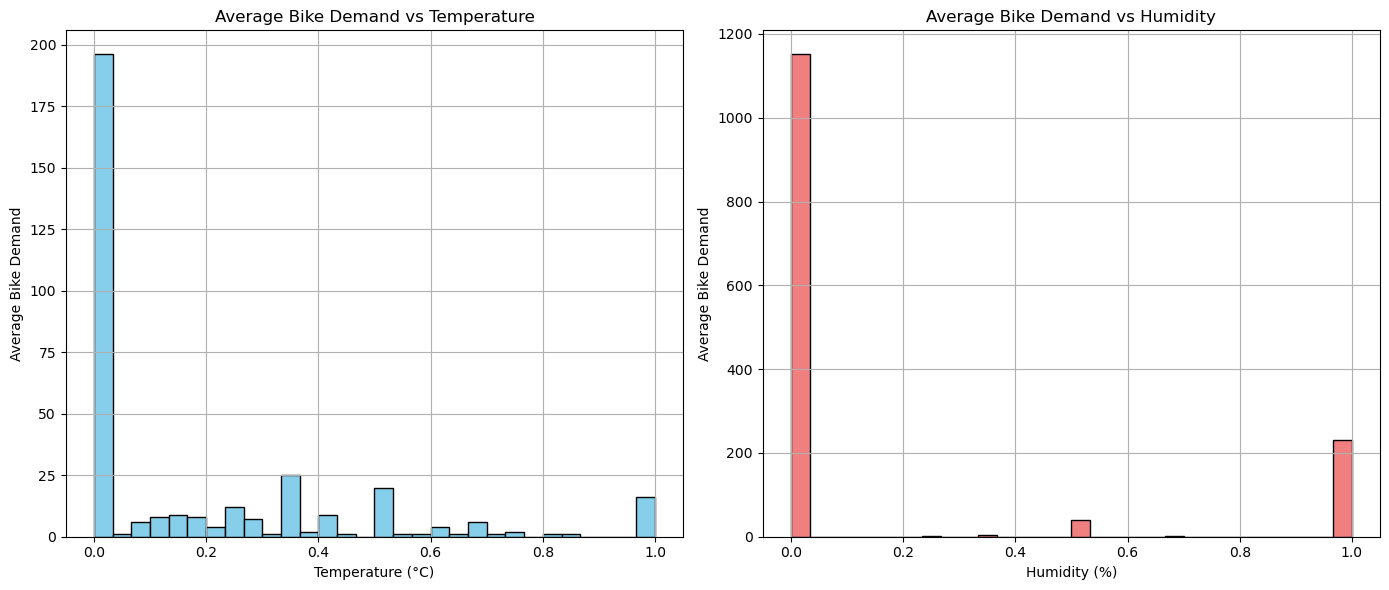

In [16]:
avg_temp_demand = data.groupby('temp')['increase_stock'].mean()
avg_humidity_demand = data.groupby('humidity')['increase_stock'].mean()

plt.figure(figsize=(14, 6))

# Histogram for Average Bike Demand vs Temperature
plt.subplot(1, 2, 1)
plt.hist(avg_temp_demand, bins=30, color='skyblue', edgecolor='black')
plt.title('Average Bike Demand vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Bike Demand')
plt.grid(True)

# Histogram for Average Bike Demand vs Humidity
plt.subplot(1, 2, 2)
plt.hist(avg_humidity_demand, bins=30, color='lightcoral', edgecolor='black')
plt.title('Average Bike Demand vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Average Bike Demand')
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()


### Correlation Matrix 

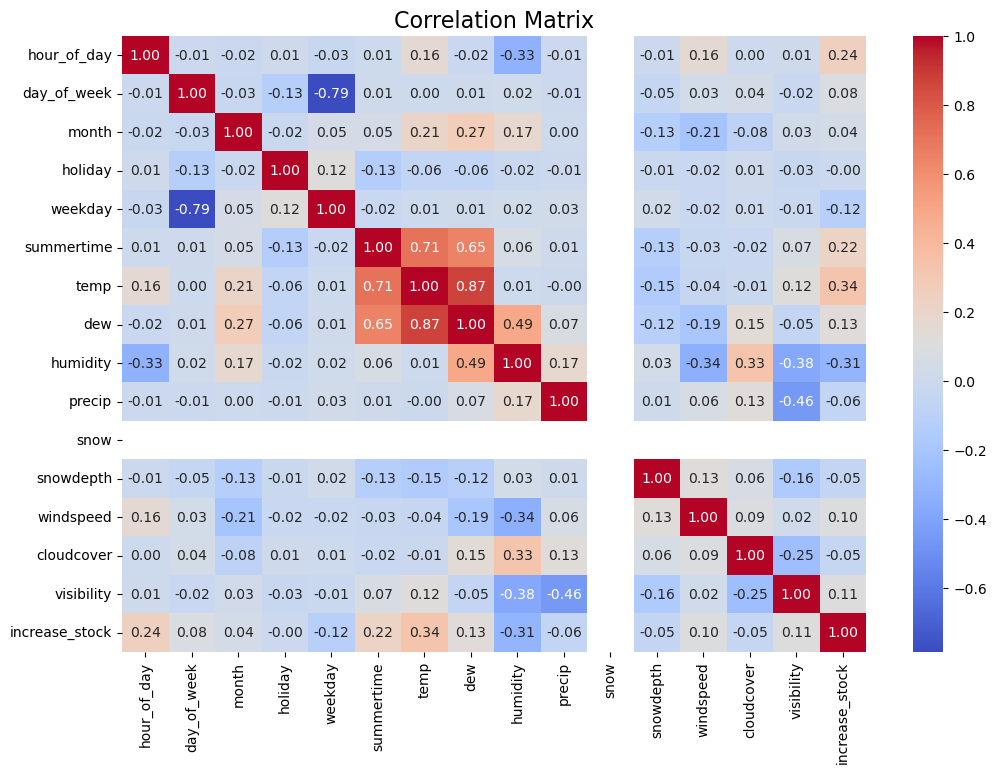

In [18]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16)
plt.show()

1. **Hour of Day (`hour_of_day`)**:
   - Moderate positive correlation (+0.24) with `increase_stock`.
   - Could be important for identifying patterns related to stock increases throughout the day.

2. **Temperature (`temp`)**:
   - Moderate positive correlation (+0.34) with `increase_stock`.
   - Reflects a potential seasonal or weather-related impact on stock.

3. **Summertime (`summertime`)**:
   - Moderate positive correlation (+0.22) with `increase_stock`.
   - Seasonal effects should be considered (e.g., increased demand during summer).

4. **Dew Point (`dew`)**:
   - Slight positive correlation (+0.13).
   - May have indirect effects or interact with temperature.

### **Variables to Possibly Transform or Interact**
- **Humidity (`humidity`)**: Weak negative correlation (-0.31). Consider interactions with `temp` or `dew`.
- **Visibility (`visibility`)**: Weak positive correlation (+0.11). Could combine with weather variables.
- **Cloud Cover (`cloudcover`)**: Weak correlation; its impact may be nonlinear.

### **New Variables to Create**
1. **Time-based Features**:
   - **Peak Hours**: Group `hour_of_day` into bins (e.g., morning, afternoon, evening) if patterns are not linear.
   - **Weekday/Weekend**: Transform `day_of_week` and `weekday` into a binary feature.

2. **Weather Indices**:
   - **Heat Index**: Combine `temp` and `humidity` to create an "apparent temperature/heat index" variable.
   - **Weather Interaction Terms**: Multiply `temp`, `humidity`, and `dew` to capture joint effects.

3. **Seasonality**:
   - Create binary flags for `holiday`, `summertime`, or specific months if patterns exist in stock increases.

4. **Rolling/Aggregate Variables**:
   - **Lagged Variables**: Introduce rolling averages or previous days’ `increase_stock` as predictors.

5. **Binary Thresholds**:
   - Create categories based on `temp` (e.g., "Hot", "Moderate", "Cold") or `visibility`.

### **Focus for Modeling**
1. **Feature Selection**:
   - Focus on variables with stronger correlations (`temp`, `summertime`, `hour_of_day`).
   - Avoid overloading the model with too many weakly correlated variables.

2. **Interaction and Nonlinear Effects**:
   - Temperature-related variables may exhibit nonlinear relationships (e.g., higher temp might impact behavior differently depending on humidity).

3. **Regularization or Feature Importance**:
   - Use methods like Lasso regression or tree-based models to validate the importance of less-correlated features.

In [20]:
data.head(10)

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,0
5,17,3,3,0,1,1,27.1,12.8,40.98,0.0,0,0.0,13.6,81.3,16.0,1
6,20,4,7,0,1,1,30.9,24.3,67.71,0.0,0,0.0,20.3,50.3,16.0,0
7,0,1,12,0,1,0,4.9,-1.7,62.46,0.0,0,0.0,21.5,100.0,16.0,0
8,18,0,11,0,1,0,16.6,13.8,83.56,0.0,0,0.0,18.1,88.9,16.0,0
9,7,5,1,0,0,0,-4.5,-12.2,55.14,0.0,0,0.0,12.4,24.4,16.0,0


## Cute Graphs

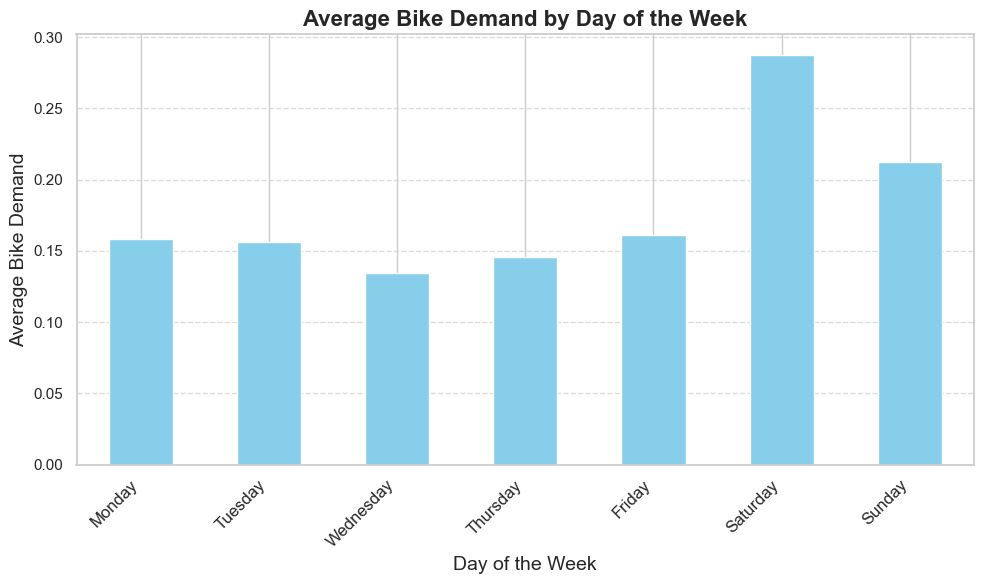

In [22]:
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.set(style="whitegrid")
ax = data.groupby('day_of_week')['increase_stock'].mean().plot(kind='bar', color='skyblue', title='Average increase_stock Value by Day of Week', figsize=(10, 6))
plt.title('Average Bike Demand by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(ticks=range(len(day_labels)), labels=day_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

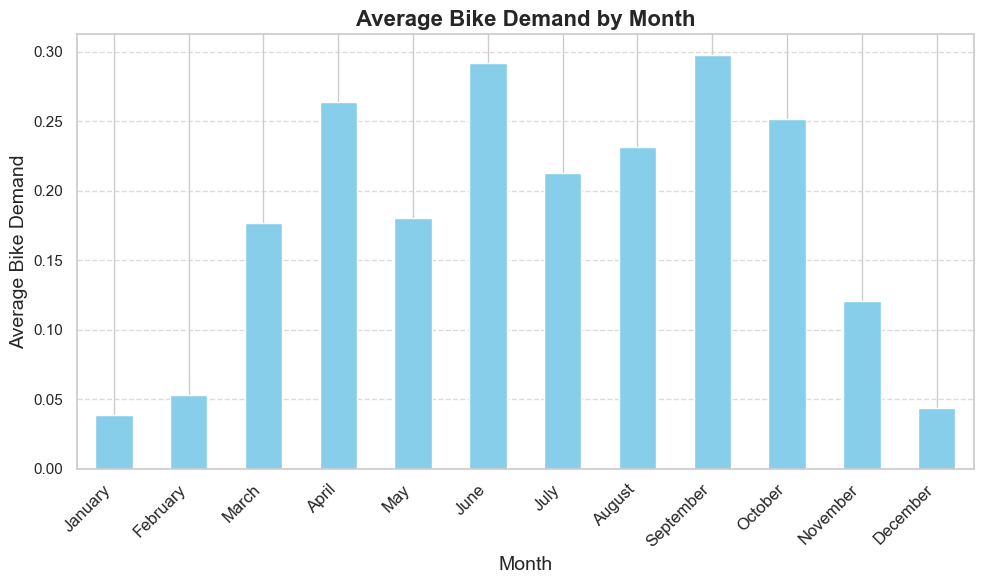

In [23]:
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sns.set(style="whitegrid")
ax = data.groupby('month')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

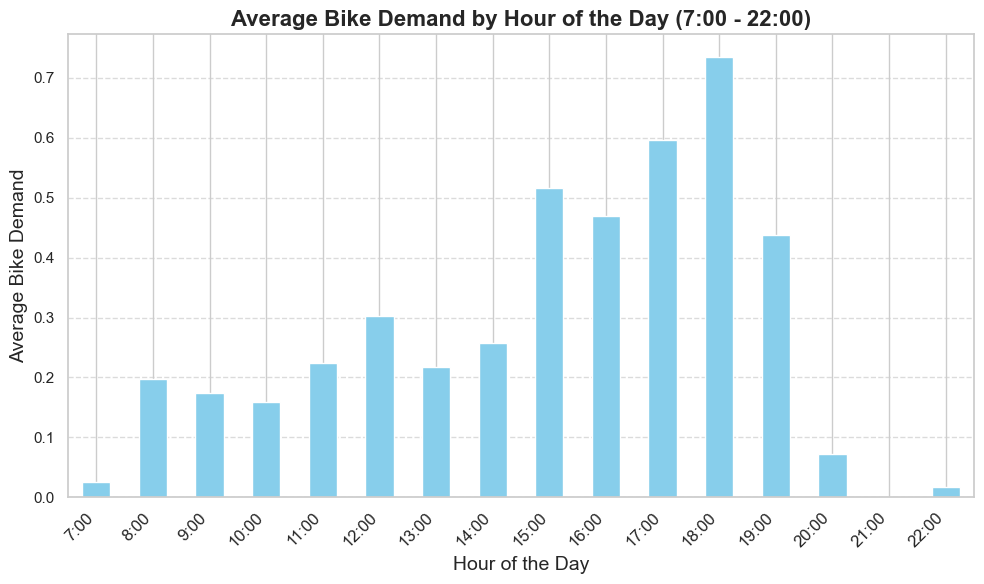

In [24]:
filtered_data = data[(data['hour_of_day'] >= 7) & (data['hour_of_day'] <= 22)]
hour_labels = [f'{i}:00' for i in range(7, 23)] 
sns.set(style="whitegrid")
ax = filtered_data.groupby('hour_of_day')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Hour of the Day (7:00 - 22:00)', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(ticks=range(len(hour_labels)), labels=hour_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

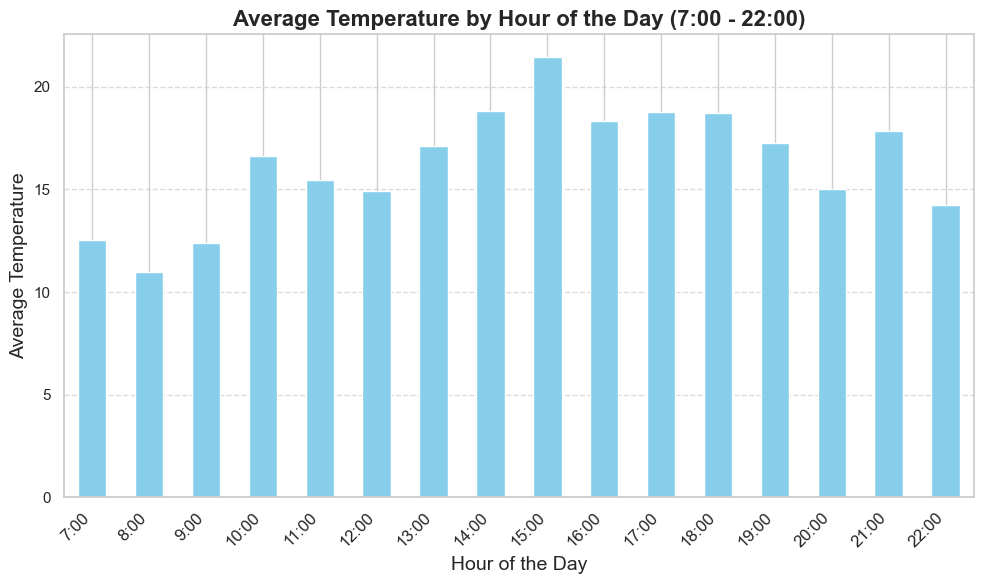

In [25]:
filtered_data = data[(data['hour_of_day'] >= 7) & (data['hour_of_day'] <= 22)]
hour_labels = [f'{i}:00' for i in range(7, 23)] 
sns.set(style="whitegrid")
ax = filtered_data.groupby('hour_of_day')['temp'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Temperature by Hour of the Day (7:00 - 22:00)', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(ticks=range(len(hour_labels)), labels=hour_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

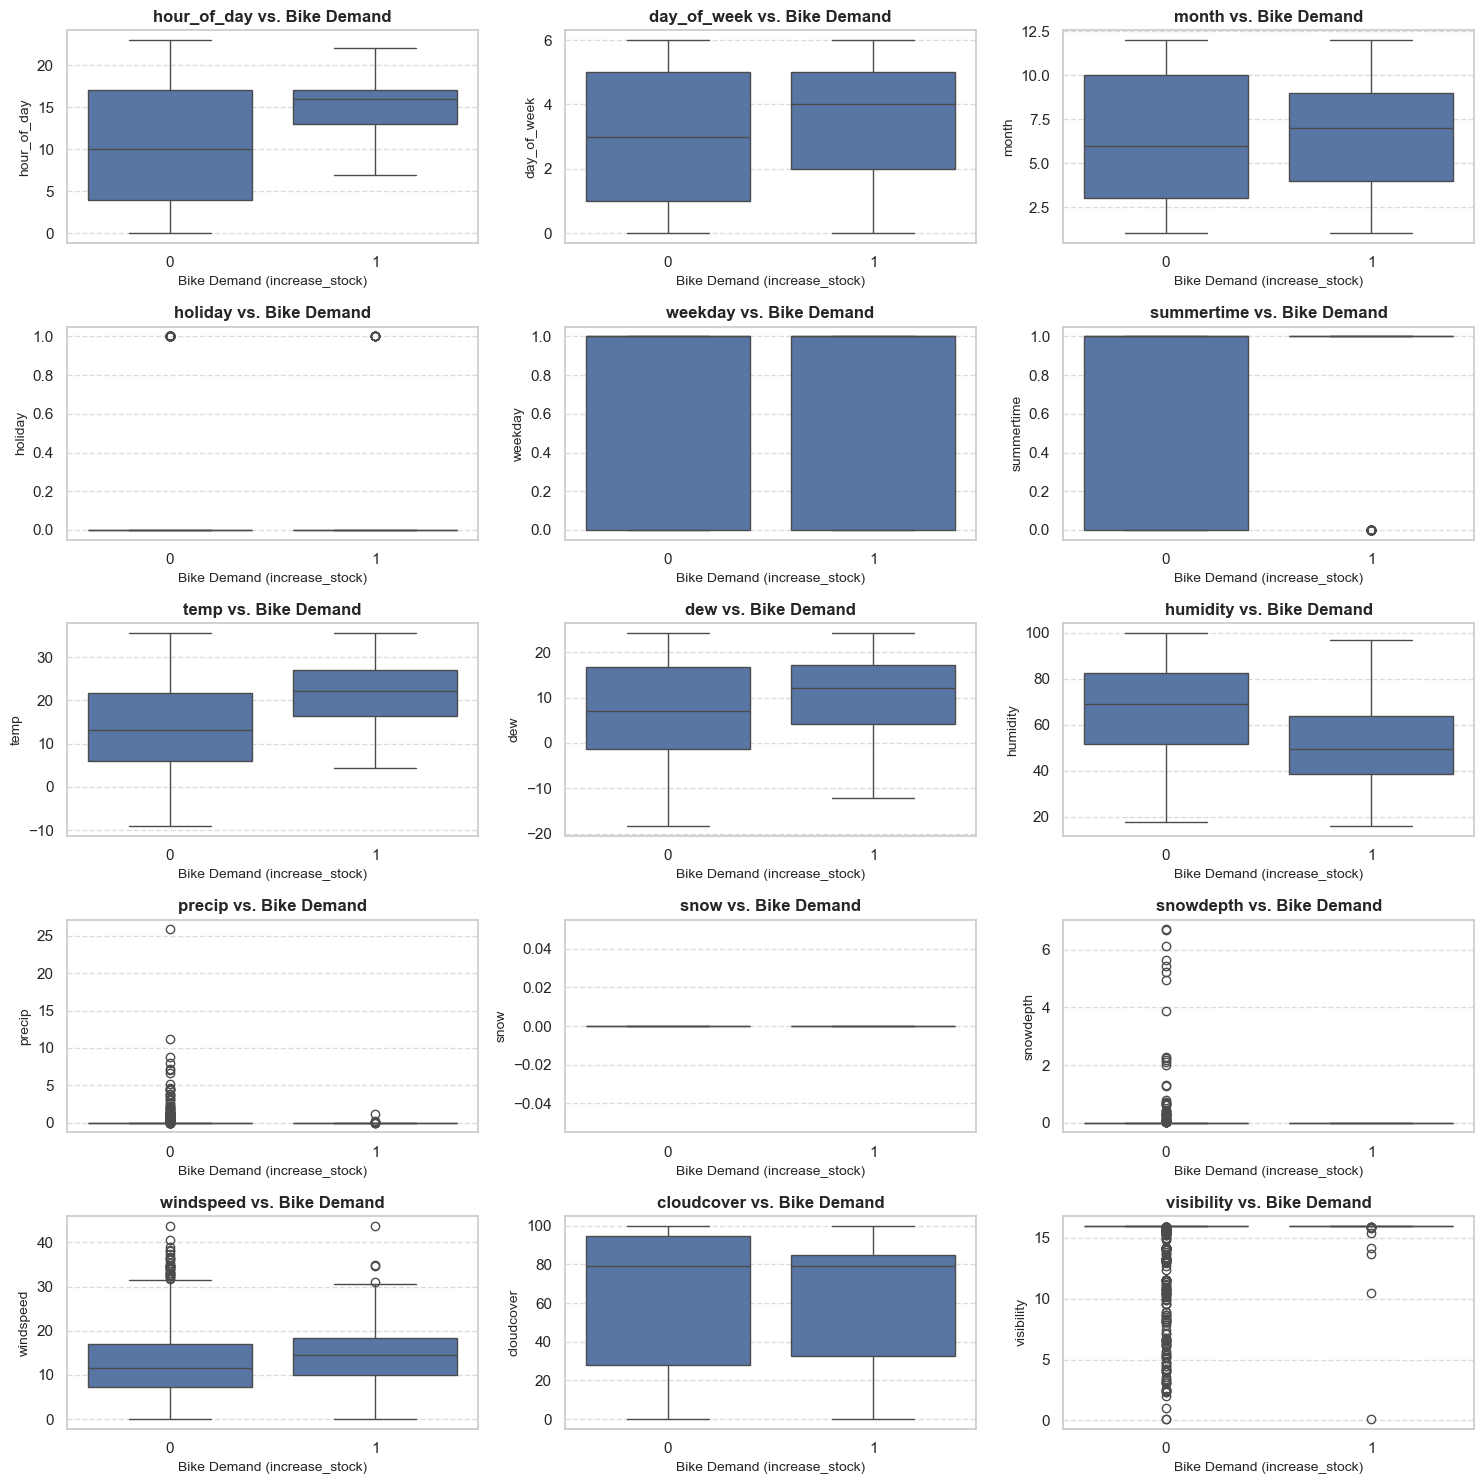

In [26]:
features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime',
            'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']

n_rows = 5
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.boxplot(x='increase_stock', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Bike Demand', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Bike Demand (increase_stock)', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

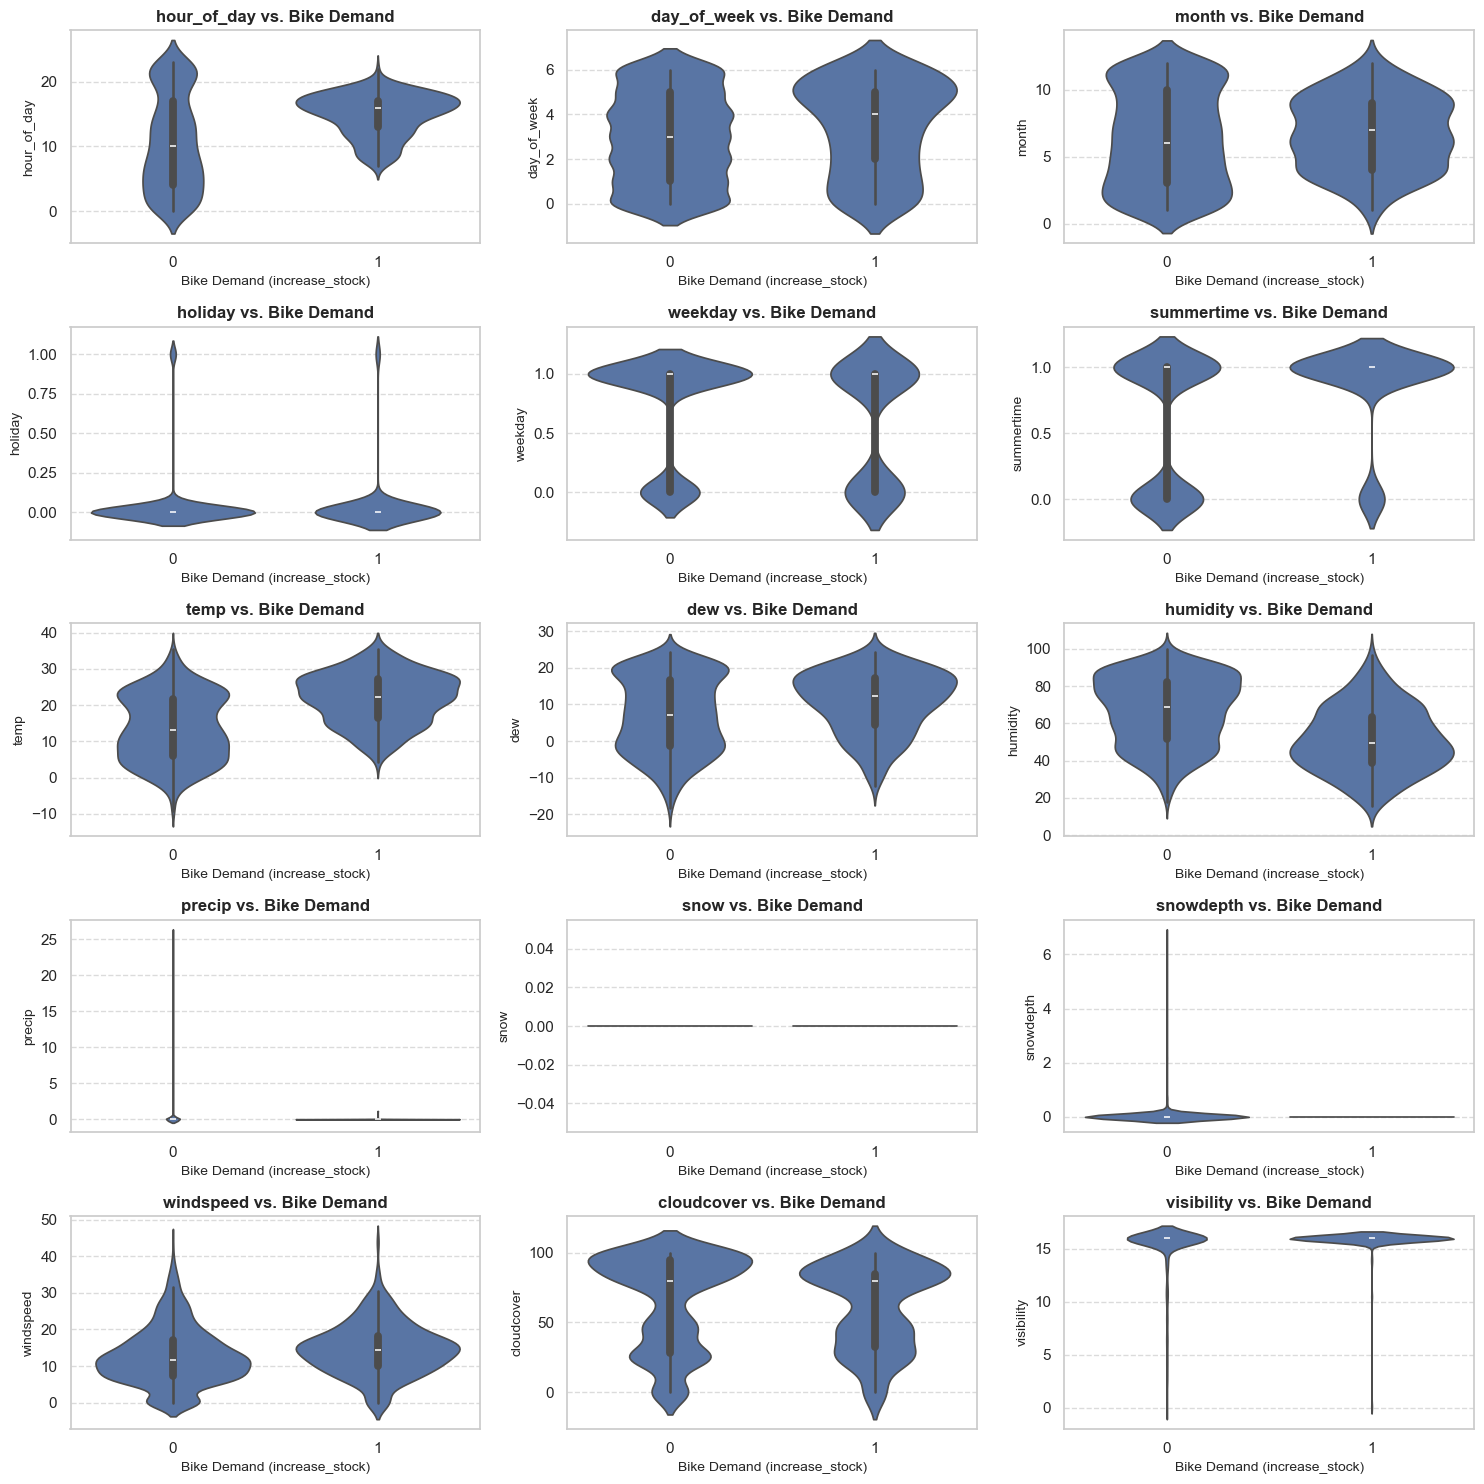

In [27]:
features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime',
            'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']

n_rows = 5
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.violinplot(x='increase_stock', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Bike Demand', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Bike Demand (increase_stock)', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

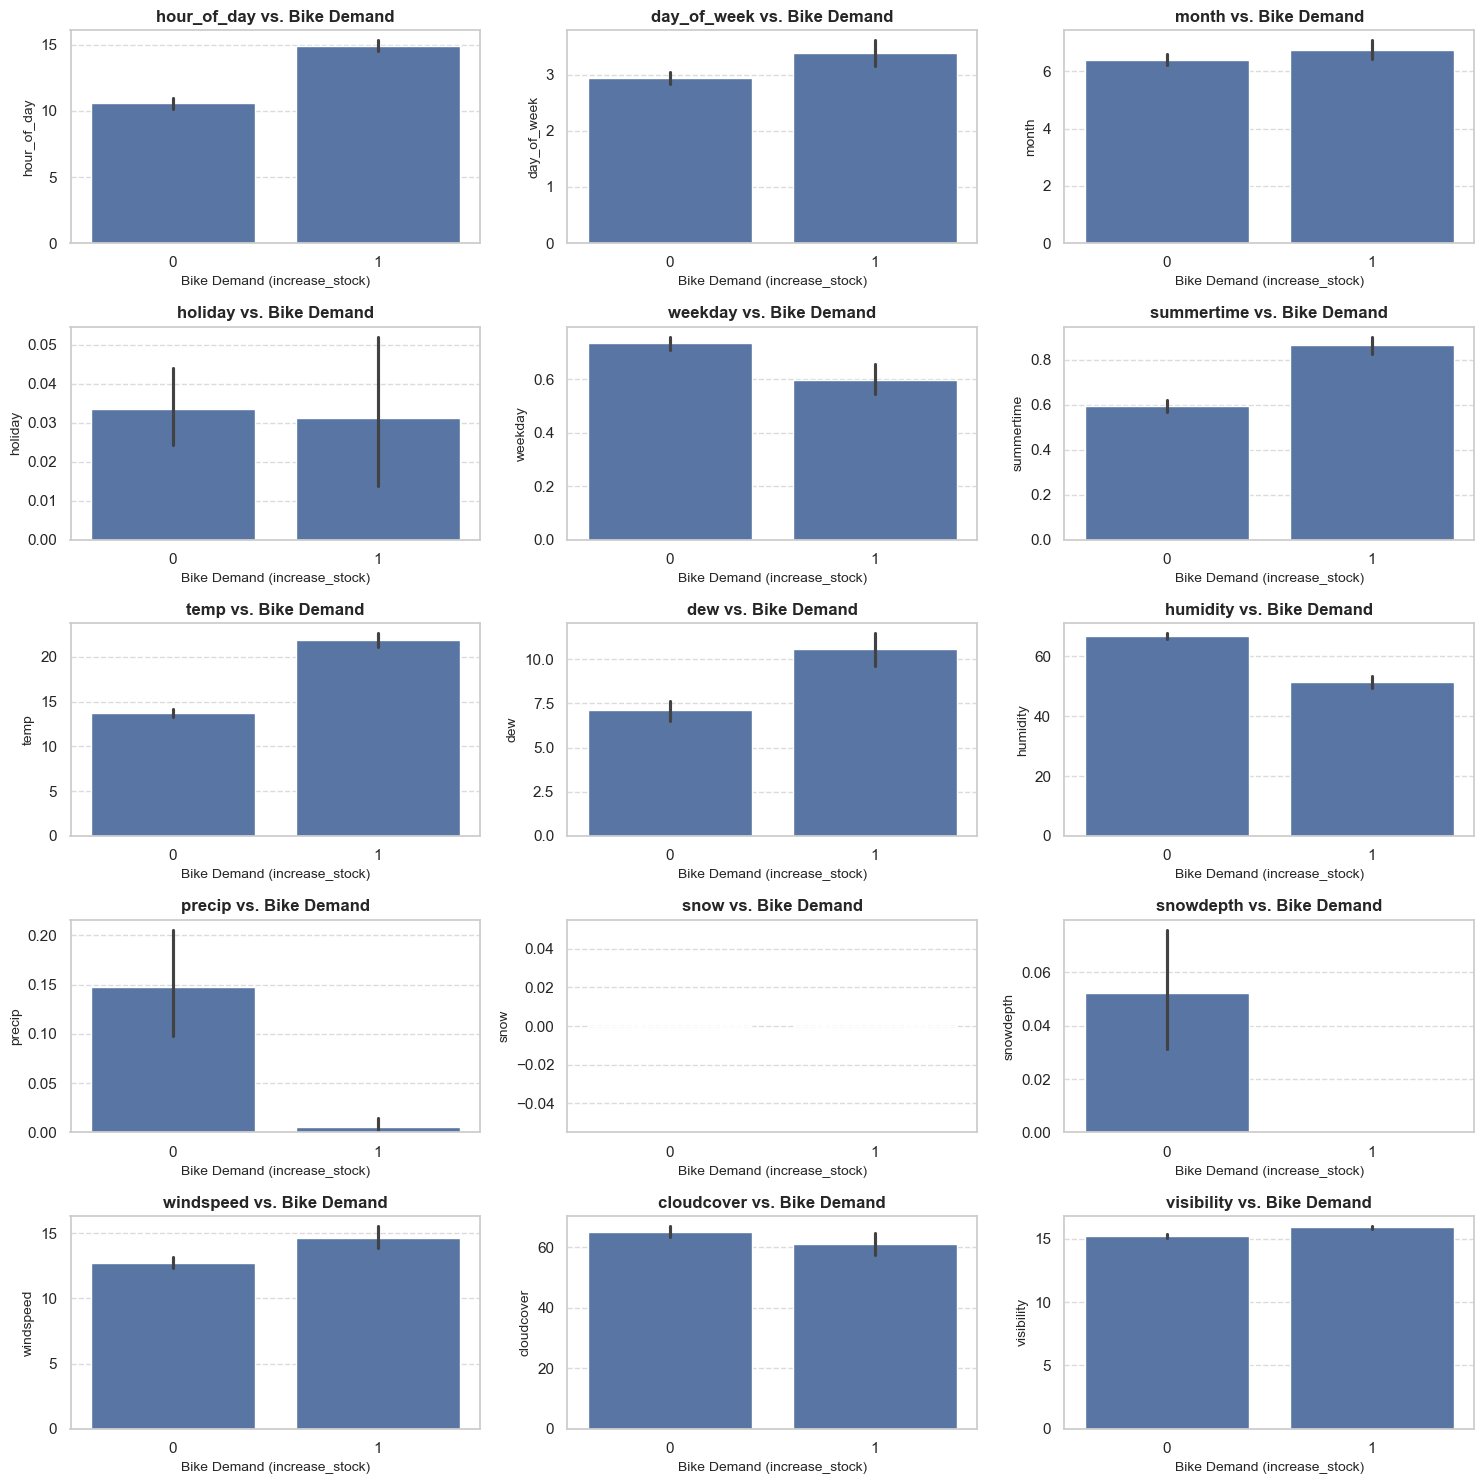

In [28]:
features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime',
            'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']

n_rows = 5
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.barplot(x='increase_stock', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Bike Demand', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Bike Demand (increase_stock)', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

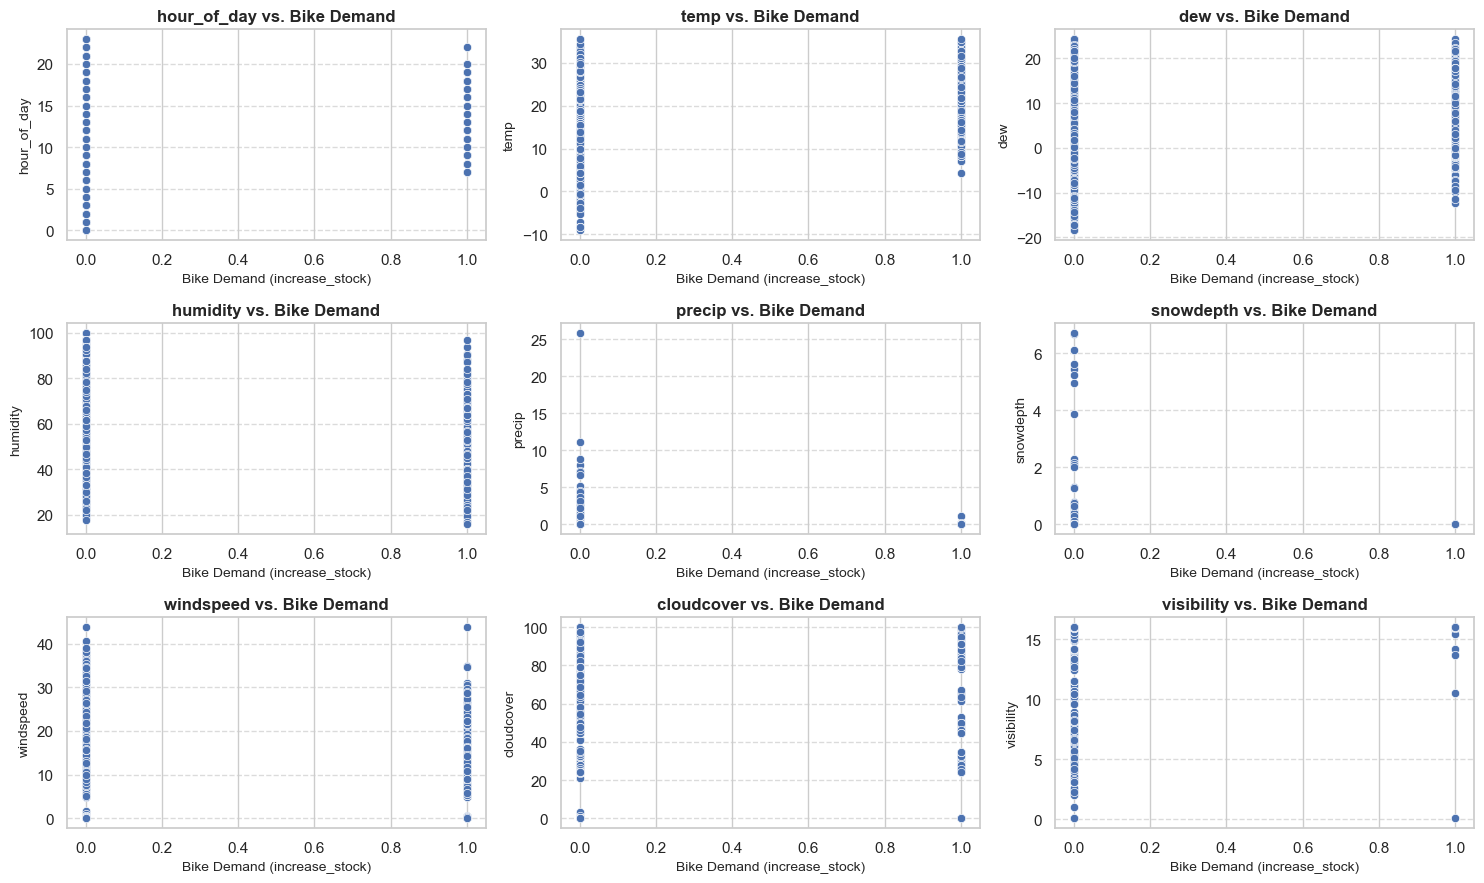

In [29]:
features = ['hour_of_day','temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']

n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 9))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.scatterplot(x='increase_stock', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Bike Demand', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Bike Demand (increase_stock)', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
class_distribution = data['increase_stock'].value_counts()
class_percentage = (class_distribution / len(data)) * 100

print("Class Distribution (Counts):")
print(class_distribution)
print("\nClass Distribution (Percentages):")
print(class_percentage)

Class Distribution (Counts):
increase_stock
0    1312
1     288
Name: count, dtype: int64

Class Distribution (Percentages):
increase_stock
0    82.0
1    18.0
Name: count, dtype: float64


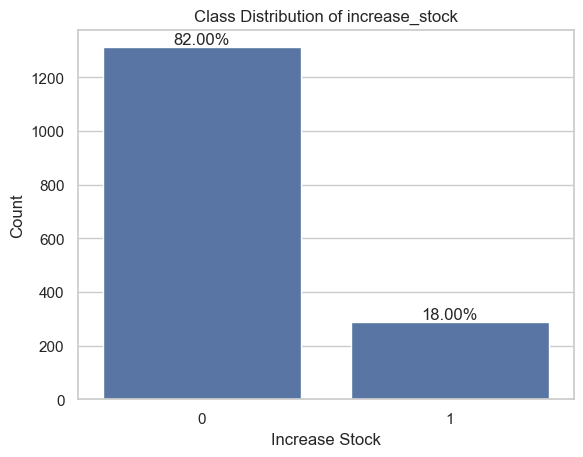

In [31]:
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution of increase_stock')
plt.xlabel('Increase Stock')
plt.ylabel('Count')
for i, v in enumerate(class_distribution.values):
    plt.text(i, v + 10, f'{class_percentage[i]:.2f}%', ha='center', fontsize=12)

plt.show() #There is an imbalance in data.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 200.1 KB


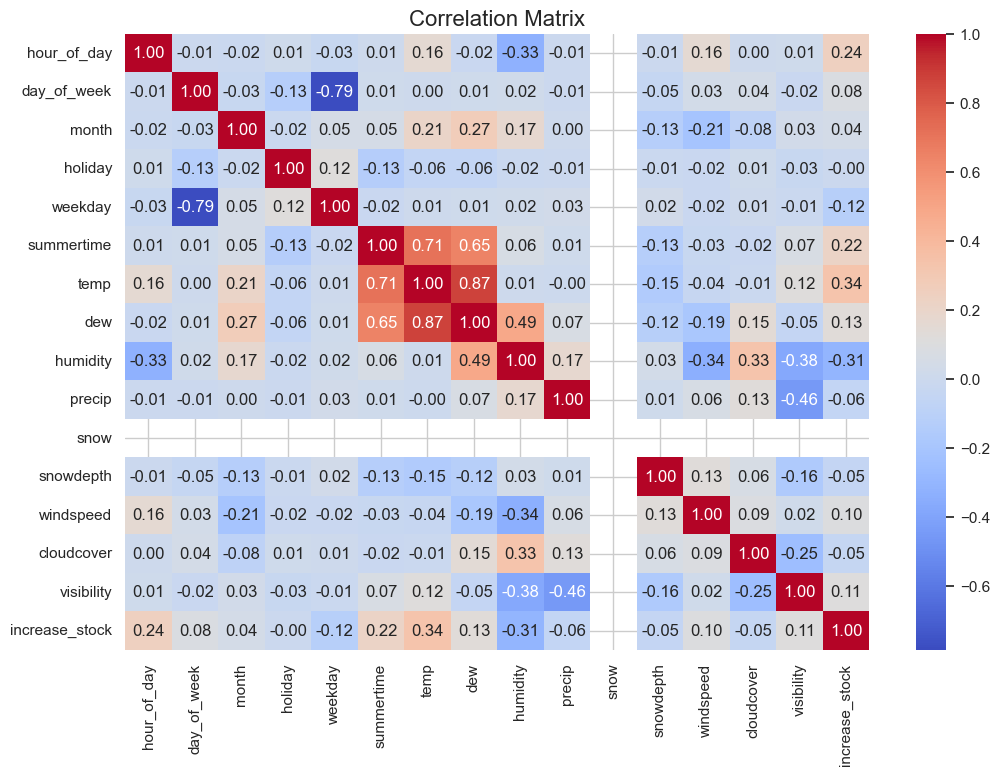

In [33]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [34]:
# Rush Hour (7 AM - 9 AM, 4 PM - 6 PM)
data['rush_hour'] = data['hour_of_day'].apply(lambda x: 1 if (7 <= x <= 9) else (2 if (16 <= x <= 18) else 0))

# Season (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)
def get_season(month):
    if month in [3, 4, 5]: return 1  # Spring
    elif month in [6, 7, 8]: return 2  # Summer
    elif month in [9, 10, 11]: return 3  # Fall
    else: return 4  # Winter
data['season'] = data['month'].apply(get_season)

# Period of the day (Night, Morning, Afternoon, Evening, Late Night)
def get_period(hour_of_day):
    if hour_of_day in range(0, 7): return 0  # Night (12 AM - 6 AM)
    elif hour_of_day in range(7, 12): return 1  # Morning (7 AM - 11 AM)
    elif hour_of_day in range(12, 17): return 2  # Afternoon (12 PM - 4 PM)
    elif hour_of_day in range(17, 21): return 3  # Evening (5 PM - 8 PM)
    else: return 4  # Late Night (9 PM - 11 PM)

data['period_of_day'] = data['hour_of_day'].apply(get_period)

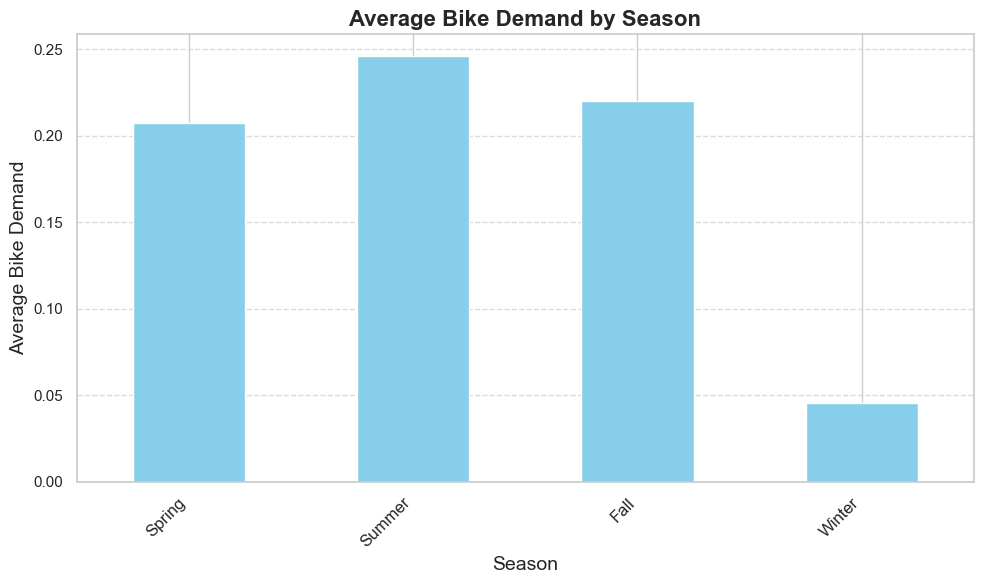

In [35]:
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']

sns.set(style="whitegrid")
ax = data.groupby('season')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(ticks=range(len(season_labels)), labels=season_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

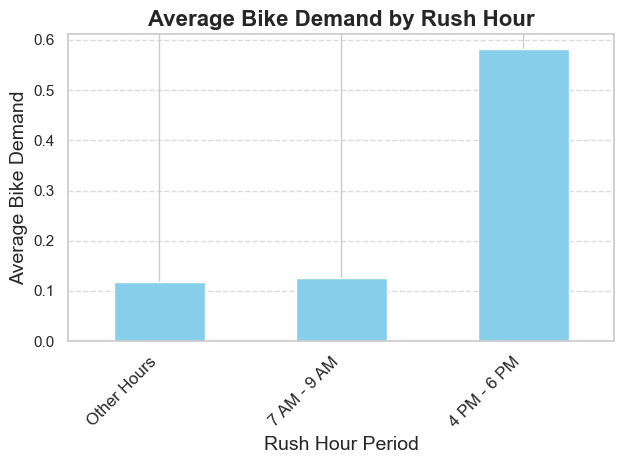

In [36]:
#IF ANYONE WANTS TO CHANGE THIS, FEEL FREE

day_labels = ['Other Hours', '7 AM - 9 AM', '4 PM - 6 PM']

sns.set(style="whitegrid")
ax = data.groupby('rush_hour')['increase_stock'].mean().plot(kind='bar', color='skyblue', title='Average increase_stock Value by Rush Hour')
plt.title('Average Bike Demand by Rush Hour', fontsize=16, fontweight='bold')
plt.xlabel('Rush Hour Period', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(ticks=range(len(day_labels)), labels=day_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

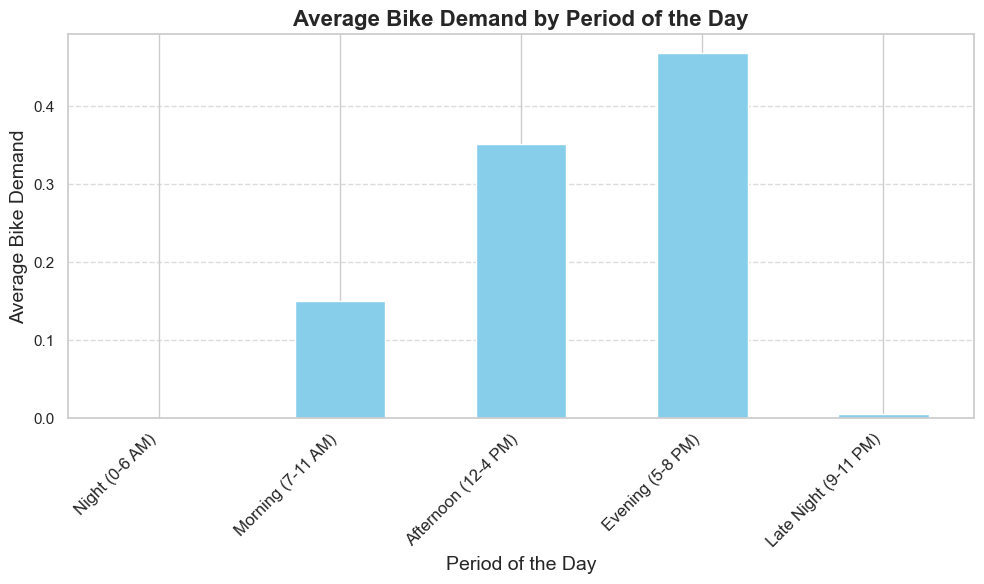

In [37]:
period_labels = ['Night (0-6 AM)', 'Morning (7-11 AM)', 'Afternoon (12-4 PM)', 'Evening (5-8 PM)', 'Late Night (9-11 PM)']

sns.set(style="whitegrid")
ax = data.groupby('period_of_day')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Period of the Day', fontsize=16, fontweight='bold')
plt.xlabel('Period of the Day', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(ticks=range(len(period_labels)), labels=period_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [38]:
bin_edges = [-10, 0, 10, 20, 30, 40]
bin_labels = [0, 1, 2, 3, 4]  

data['temp_binned'] = pd.cut(data['temp'], bins=bin_edges, labels=bin_labels, right=False)
data['temp_binned'] = data['temp_binned'].astype(int)

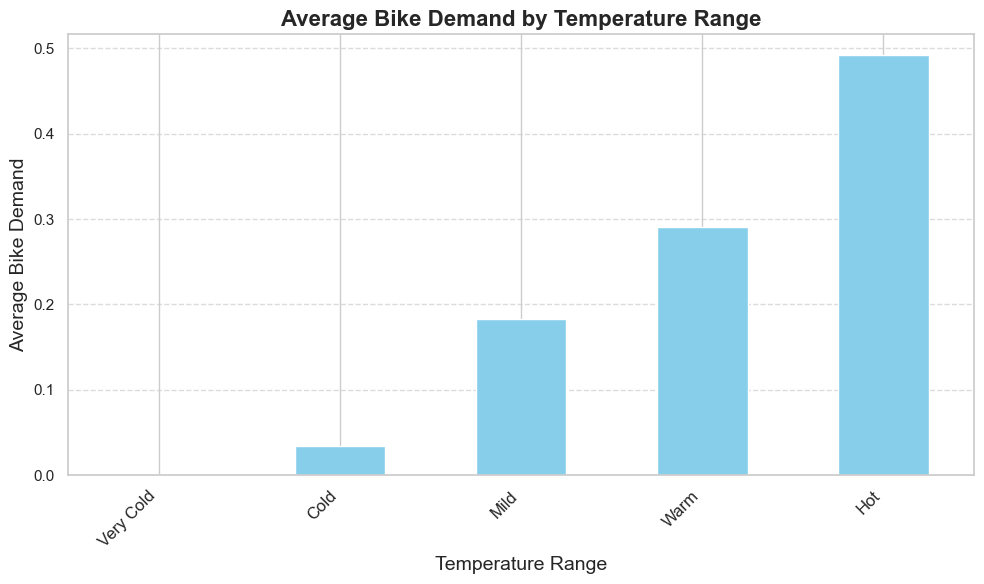

In [39]:
bin_labels = ['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot']

sns.set(style="whitegrid")
ax = data.groupby('temp_binned', observed=False)['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Temperature Range', fontsize=16, fontweight='bold')
plt.xlabel('Temperature Range', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

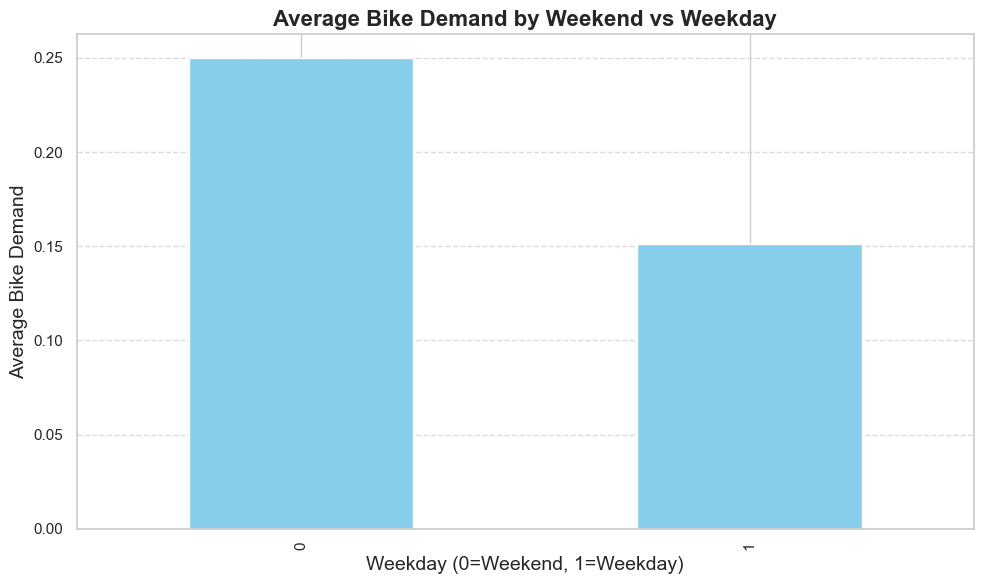

In [40]:
sns.set(style="whitegrid")
ax = data.groupby('weekday')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Weekend vs Weekday', fontsize=16, fontweight='bold')
plt.xlabel('Weekday (0=Weekend, 1=Weekday)', fontsize=14)  # Corrected label
plt.ylabel('Average Bike Demand', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

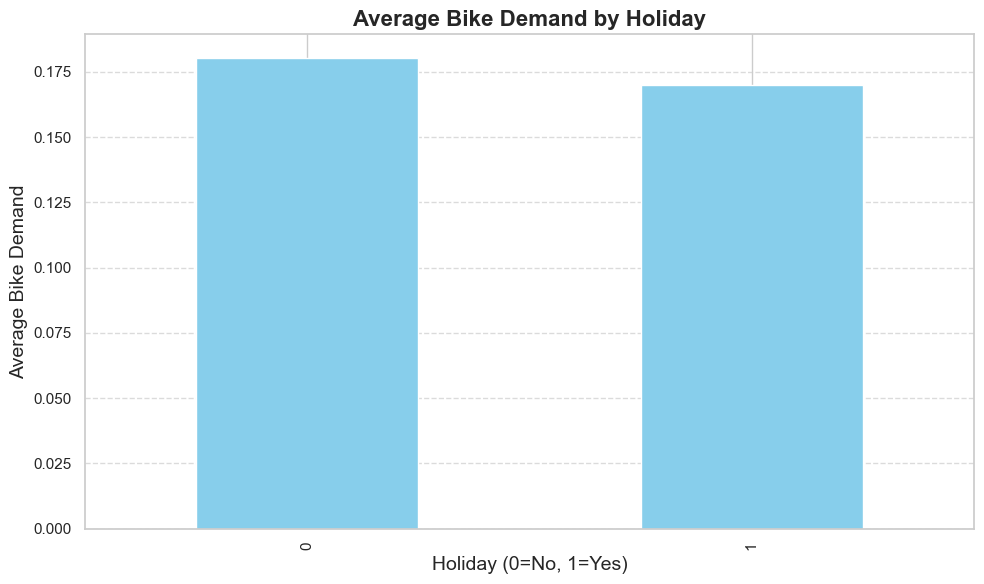

In [41]:
sns.set(style="whitegrid")
ax = data.groupby('holiday')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Holiday', fontsize=16, fontweight='bold')
plt.xlabel('Holiday (0=No, 1=Yes)', fontsize=14)  # Corrected label
plt.ylabel('Average Bike Demand', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/zw/8dwhqjjd5zd7q6rn_6mwhgqm0000gn/T/ipykernel_9936/2621352074.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = data.groupby('precip_binned')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))


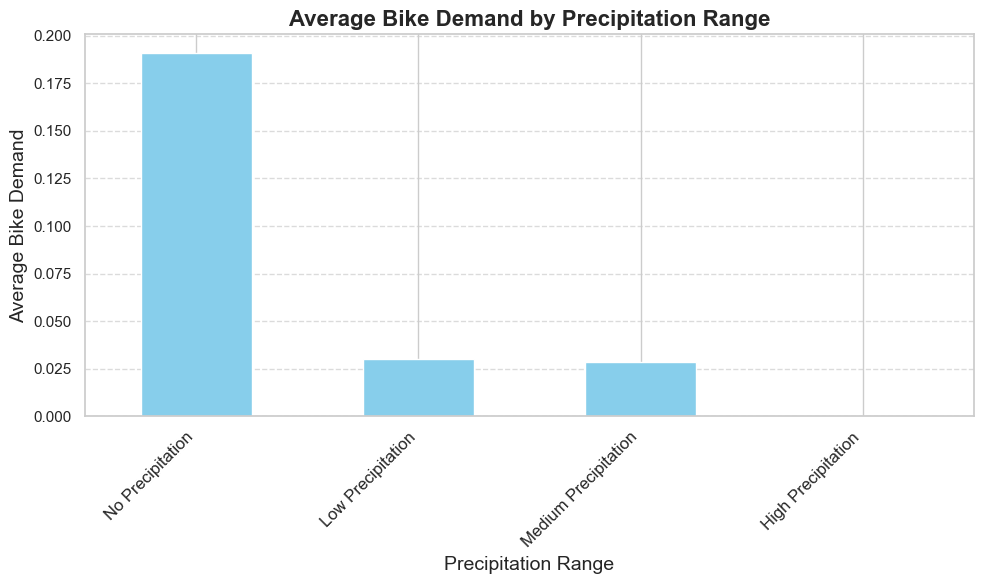

In [42]:
# Step 1: Define bins and labels for precipitation
precip_bins = [0, 0.1, 1, 5, float('inf')]  # Adjust these bin edges based on your data range
precip_labels = ['No Precipitation', 'Low Precipitation', 'Medium Precipitation', 'High Precipitation']

# Step 2: Bin the precipitation values
data['precip_binned'] = pd.cut(data['precip'], bins=precip_bins, labels=precip_labels, right=False)

# Step 3: Plot the results
sns.set(style="whitegrid")
ax = data.groupby('precip_binned')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Precipitation Range', fontsize=16, fontweight='bold')
plt.xlabel('Precipitation Range', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotated labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/zw/8dwhqjjd5zd7q6rn_6mwhgqm0000gn/T/ipykernel_9936/3141608816.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = data.groupby('humidity_binned')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))


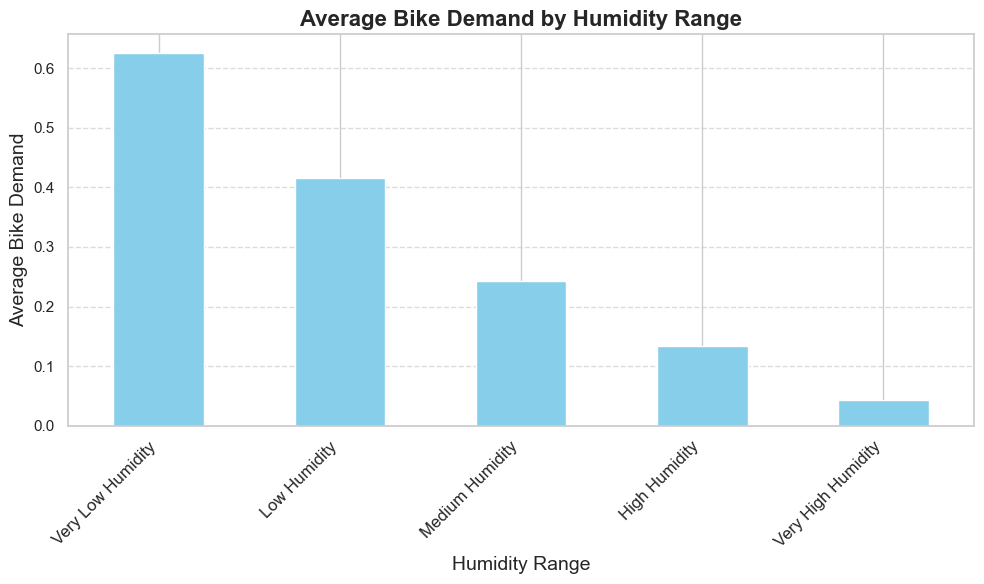

In [43]:
# New bins with more granularity
humidity_bins = [0, 20, 40, 60, 80, 100]
humidity_labels = ['Very Low Humidity', 'Low Humidity', 'Medium Humidity', 'High Humidity', 'Very High Humidity']

# Step 2: Bin the humidity values
data['humidity_binned'] = pd.cut(data['humidity'], bins=humidity_bins, labels=humidity_labels, right=False)

# Step 3: Plot the results
sns.set(style="whitegrid")
ax = data.groupby('humidity_binned')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Humidity Range', fontsize=16, fontweight='bold')
plt.xlabel('Humidity Range', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotated labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [44]:
# Get the range (min and max) of the humidity column
humidity_range = data['humidity'].min(), data['humidity'].max()
print(f"Humidity range: {humidity_range}")

Humidity range: (15.85, 99.89)


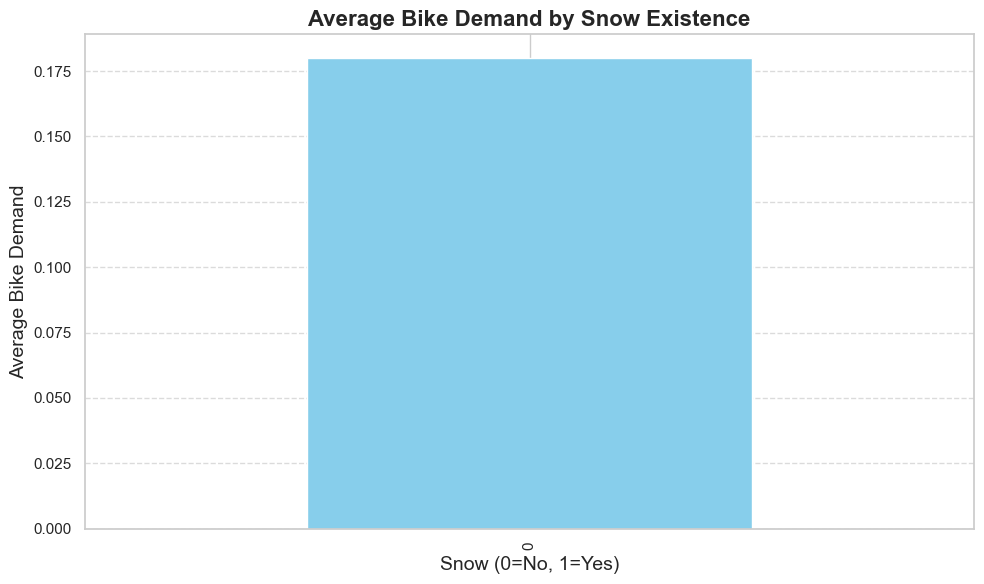

In [45]:
# Create a new DataFrame with both 0 and 1 values for the 'snow' column
snow_data = data.groupby('snow')['increase_stock'].mean()

sns.set(style="whitegrid")
ax = snow_data.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Snow Existence', fontsize=16, fontweight='bold')
plt.xlabel('Snow (0=No, 1=Yes)', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

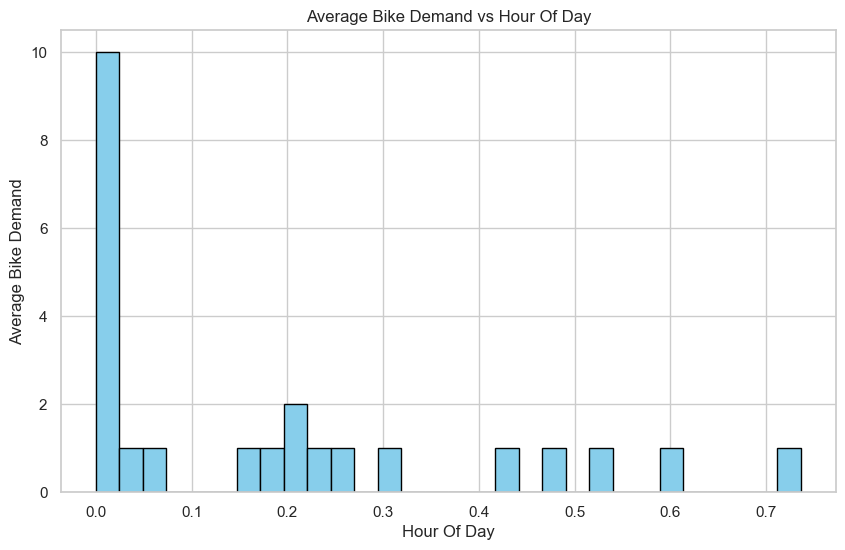

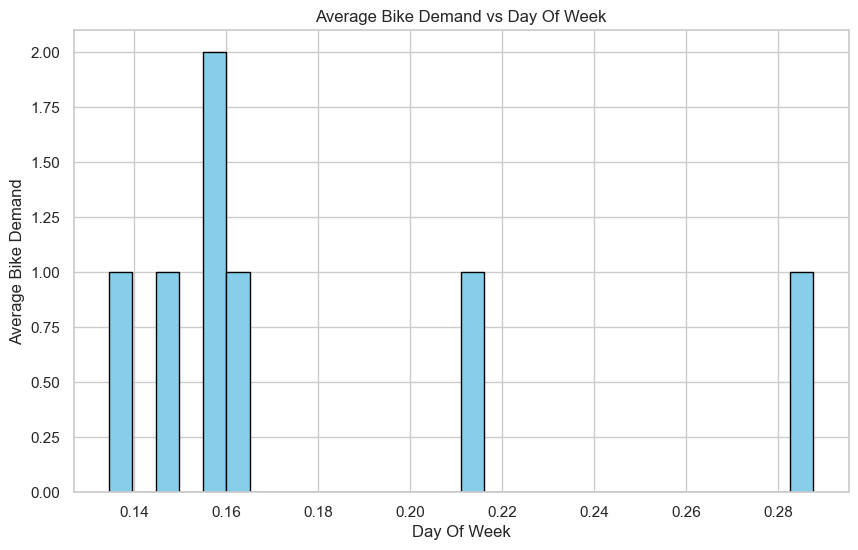

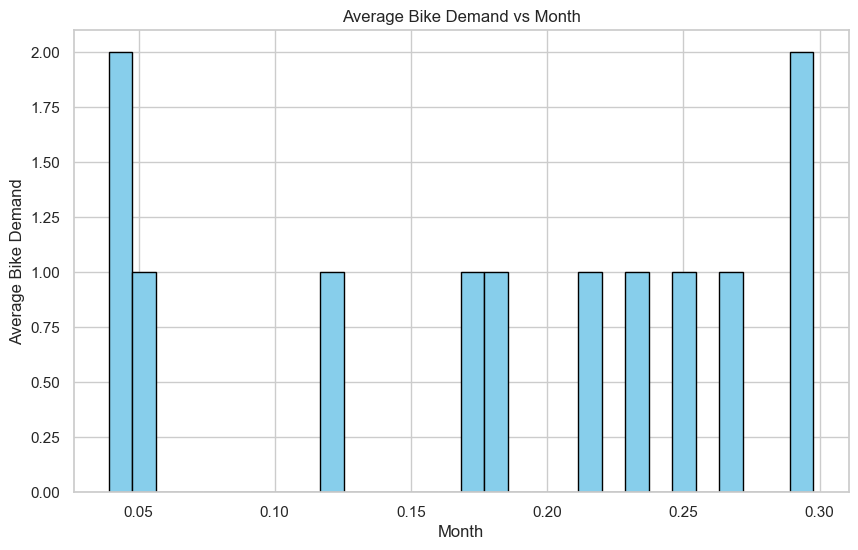

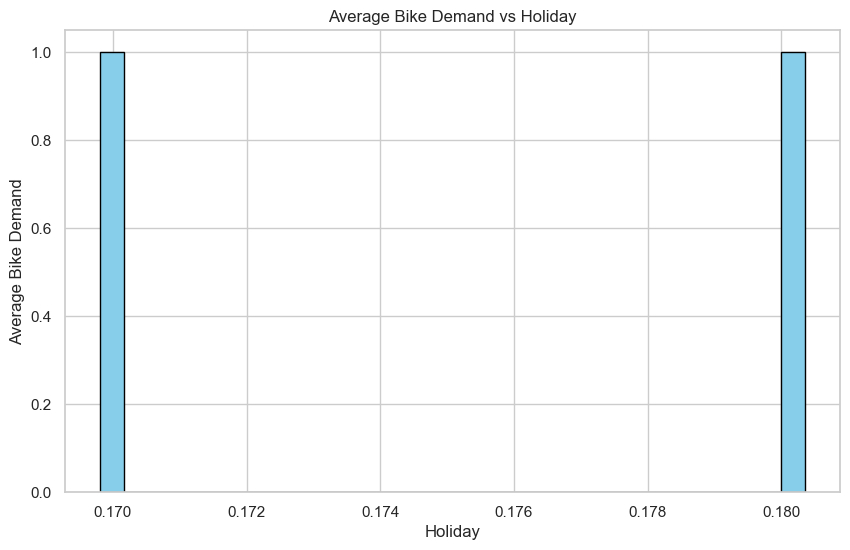

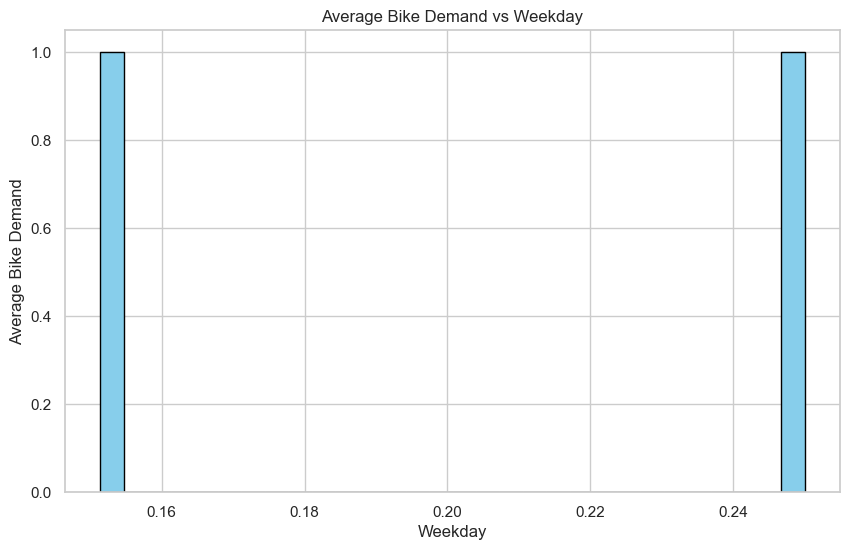

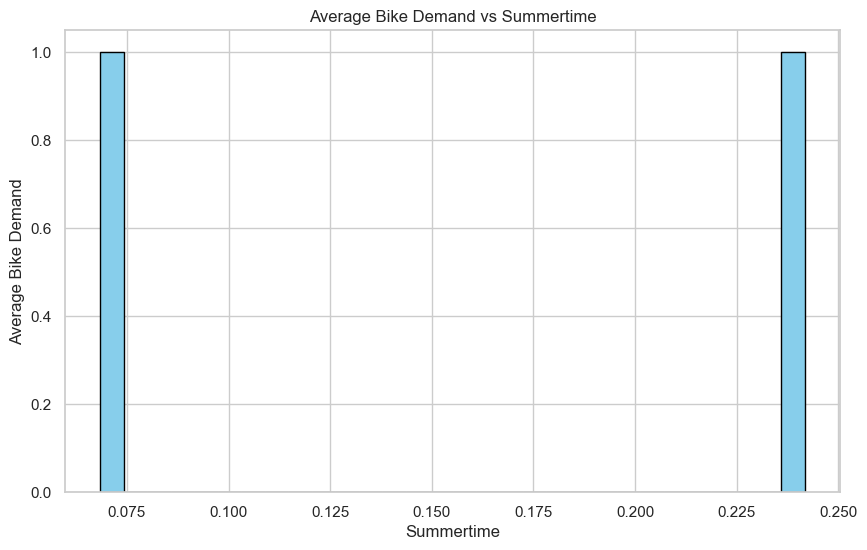

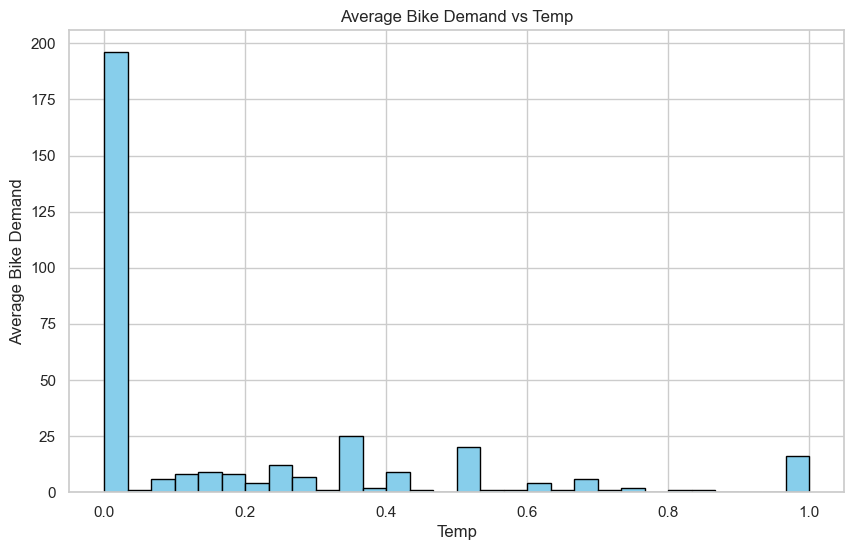

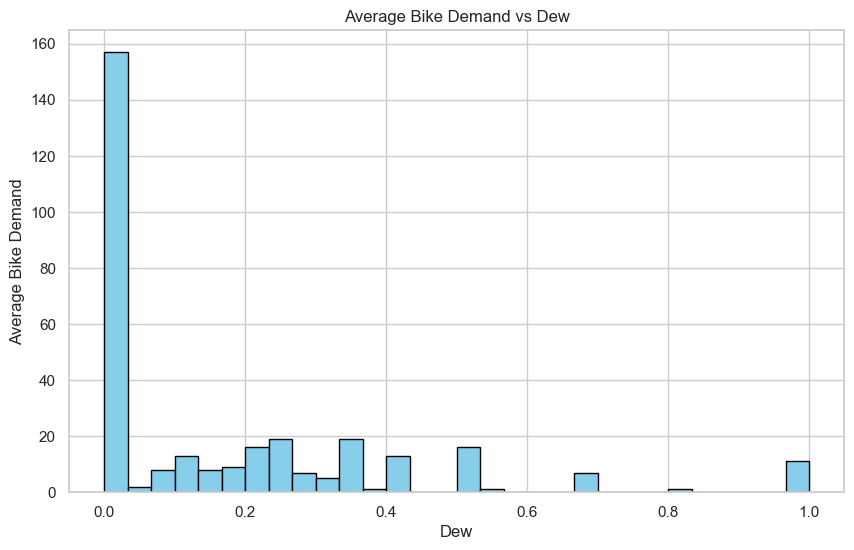

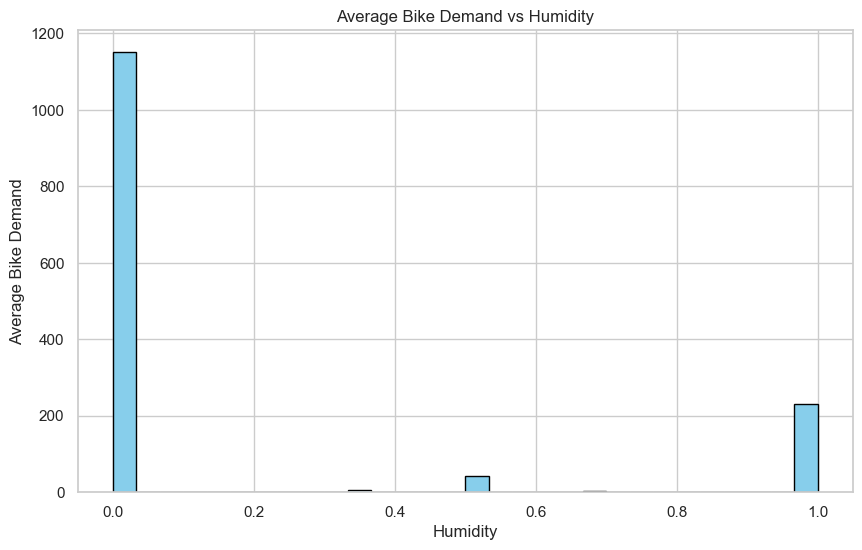

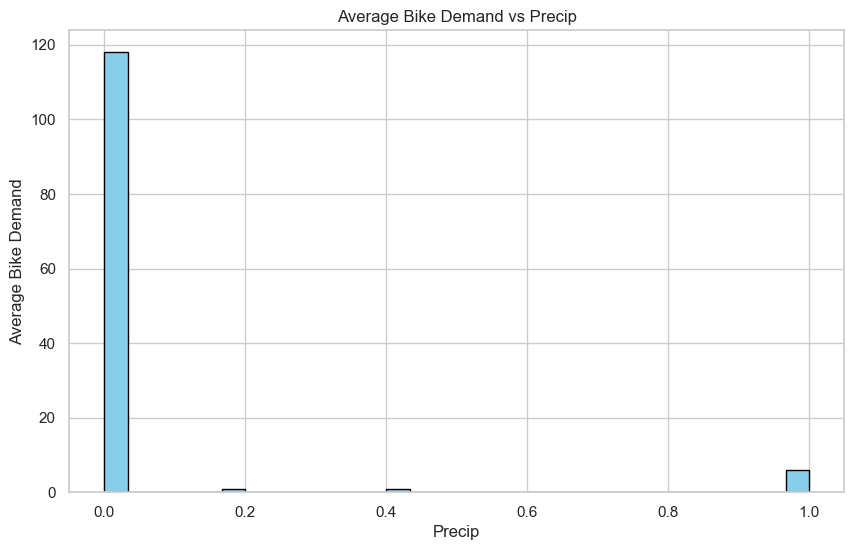

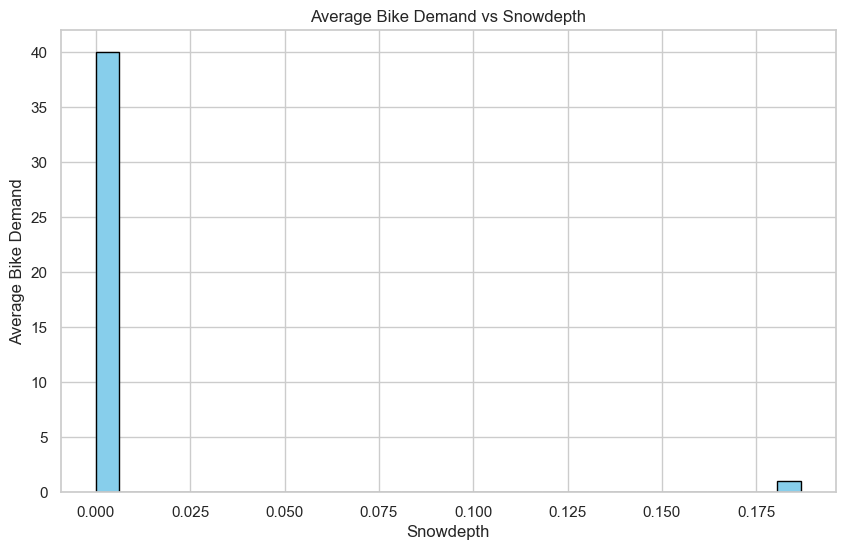

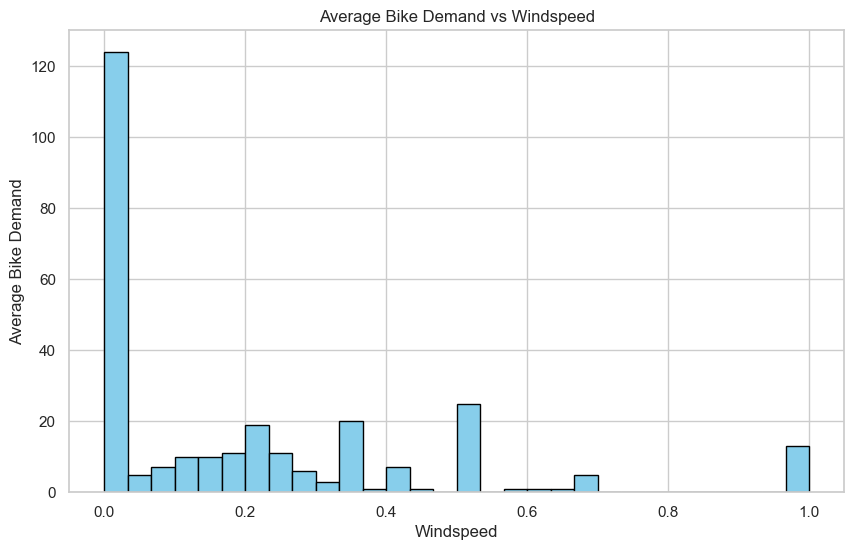

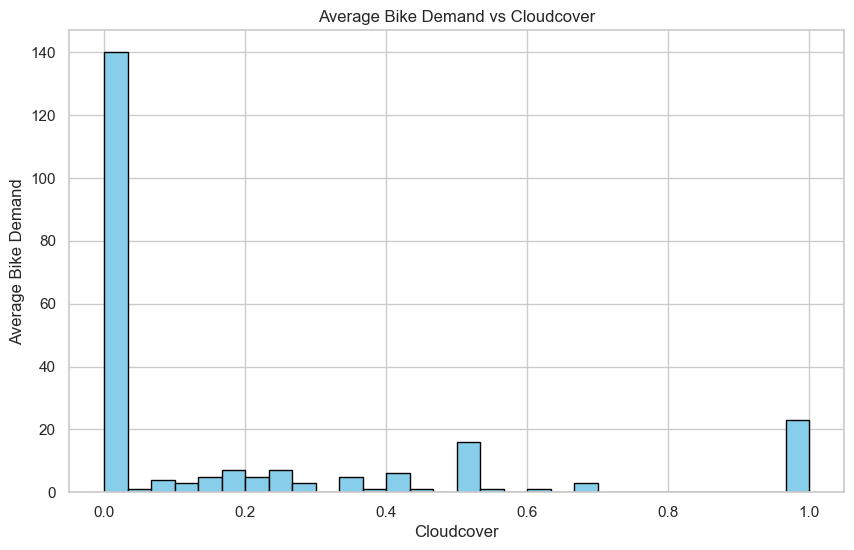

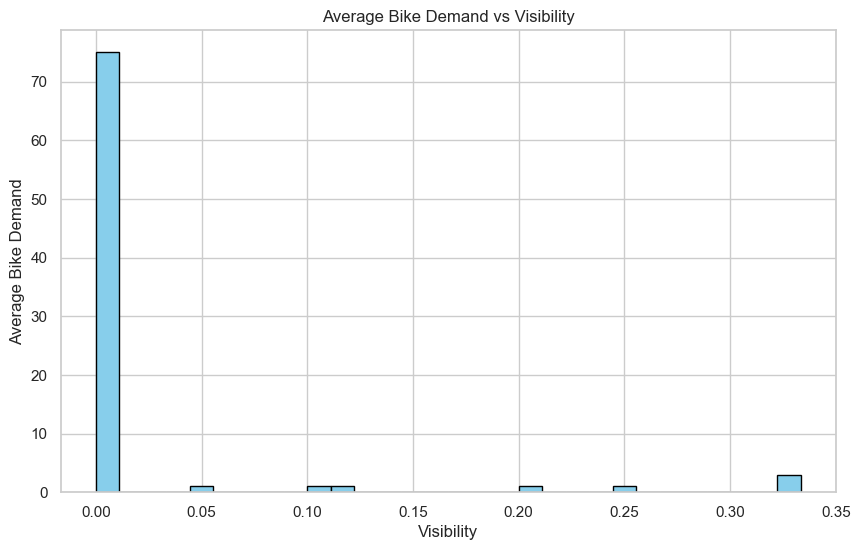

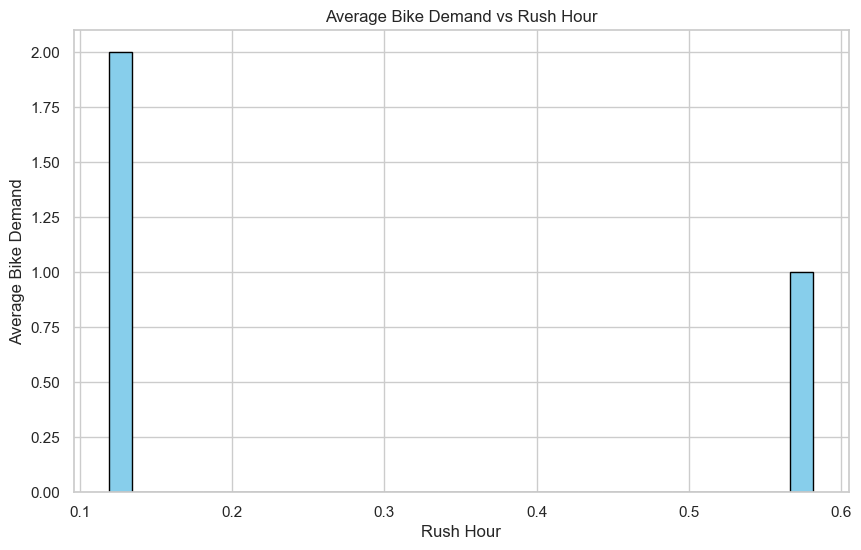

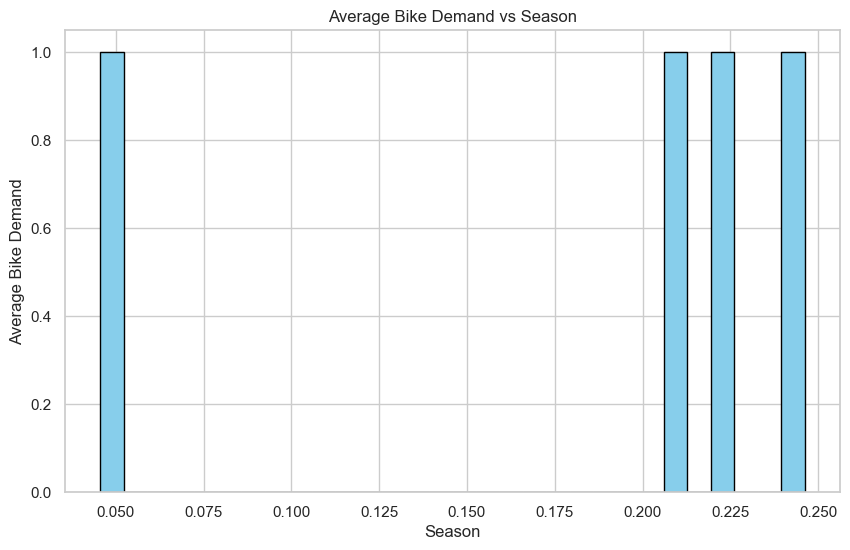

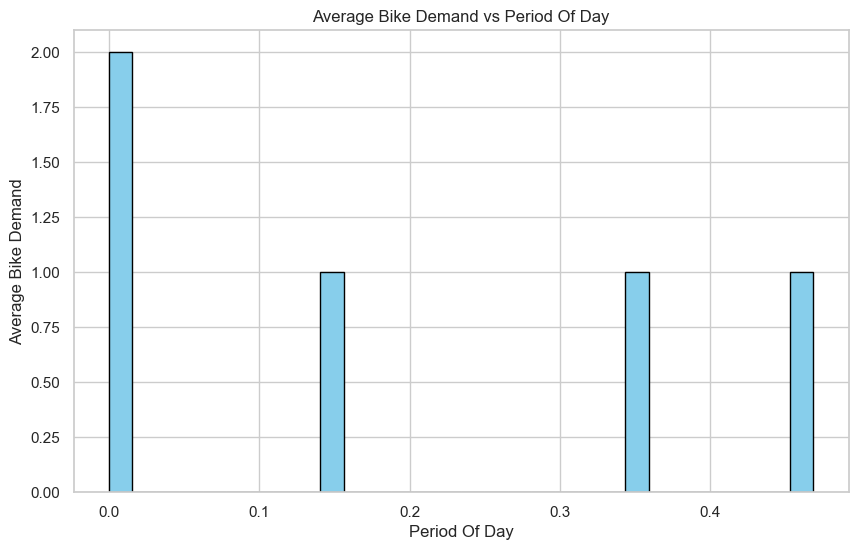

KeyError: 'heat_index'

In [47]:
variables = [
    'hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime',
    'temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 
    'visibility', 'rush_hour', 'season', 'period_of_day', 'heat_index', 
    'temp_dew_interaction', 'humidity_dew_interaction', 'temp_humidity_dew_interaction', 
    'temp_binned', 'temp_humidity_ratio', 'temp_plus_humidity'
]

# Create histograms for each variable
for var in variables:
    avg_demand = data.groupby(var)['increase_stock'].mean()
    
    plt.figure(figsize=(10, 6))
    plt.hist(avg_demand, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Average Bike Demand vs {var.replace("_", " ").title()}')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Average Bike Demand')
    plt.grid(True)
    plt.show()